In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [54]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [55]:
survivors_count = train_df[train_df['Survived'] == 1]['Survived'].count()
victims_count = train_df[train_df['Survived'] == 0]['Survived'].count()

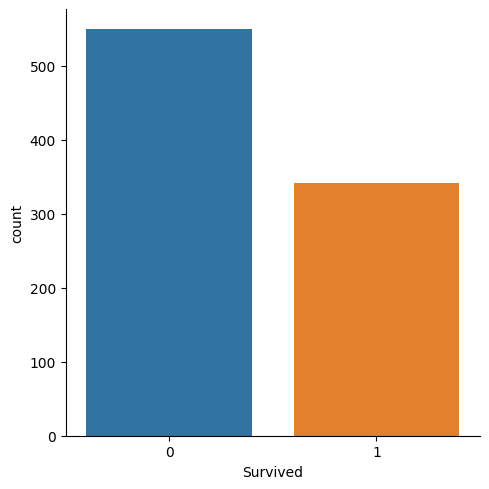

In [56]:
sns.catplot(train_df, x='Survived', kind='count')

In [57]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [58]:
label_encoder = LabelEncoder()

In [59]:
train_df['Sex'] = label_encoder.fit_transform(train_df['Sex']) 
train_df['Ticket'] = label_encoder.fit_transform(train_df['Ticket']) 
train_df['Cabin'] = label_encoder.fit_transform(train_df['Cabin']) 
train_df['Embarked'] = label_encoder.fit_transform(train_df['Embarked']) 

test_df['Sex'] = label_encoder.fit_transform(test_df['Sex']) 
test_df['Ticket'] = label_encoder.fit_transform(test_df['Ticket']) 
test_df['Cabin'] = label_encoder.fit_transform(test_df['Cabin']) 
test_df['Embarked'] = label_encoder.fit_transform(test_df['Embarked']) 

In [60]:
train_df = train_df.dropna()
test_df = test_df.dropna()

# Raw data classification
First I will run all the classifiers with the raw data to further prove that scaling and preprocessing the data we can obtain better results

## KNN Classifier

In [62]:
train_df_Y = train_df['Survived']
train_df_X = train_df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']]


test_df_X = test_df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']]

In [76]:
KNNclassifier = KNeighborsClassifier(n_neighbors=3)

In [77]:
KNNclassifier.fit(train_df_X, train_df_Y)

KNeighborsClassifier(n_neighbors=3)

In [78]:
KNNclassifier.score(train_df_X, train_df_Y)

0.8319327731092437

In [79]:
test_df_Y = KNNclassifier.predict(test_df_X)

In [80]:
test_df_Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,